# **Apple Quality Prediction**

#### Walter Sostene Losa - Filippo Finke

In [31]:
# Importing the libraries used in the project
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import umap

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
df = pd.read_csv('apple_quality.csv')

## 1. Dataset Description

In [33]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [34]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [35]:
#Checking for missing values and remove them
print(df.isnull().sum())
df = df.dropna()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [36]:
#Checking for duplicates and remove them
print(df.duplicated().sum())
df = df.drop_duplicates()

0


In [37]:
df.shape

(4000, 9)

In [38]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [39]:
# Drop the A_id column
df = df.drop('A_id', axis=1)

In [40]:
#mapp quality to numerical values
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
df.dtypes


Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int64
dtype: object

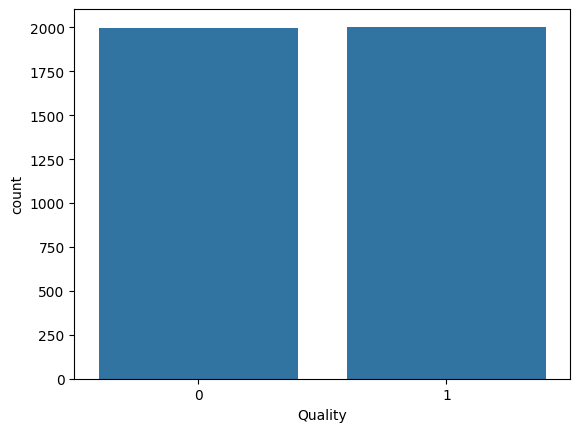

Quality
1    2004
0    1996
Name: count, dtype: int64

In [41]:
# See distribution of target variable
sns.countplot(x='Quality', data=df)
plt.show()

df['Quality'].value_counts()

## 2. Dataset Analysis

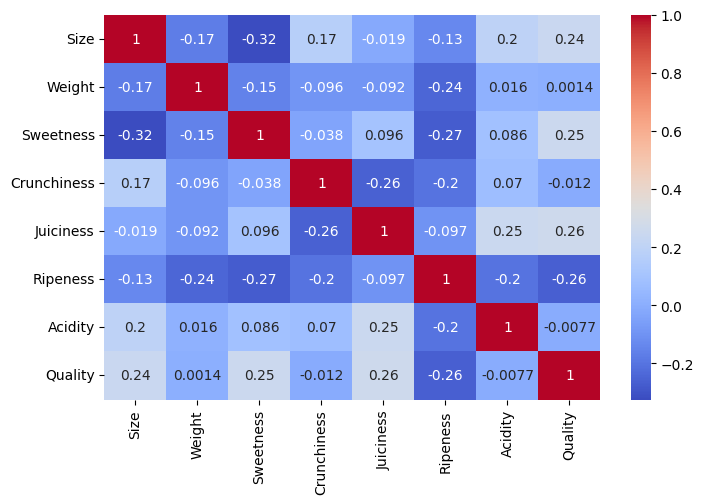

In [42]:
# print correlation matrix and fix dimension
corr = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

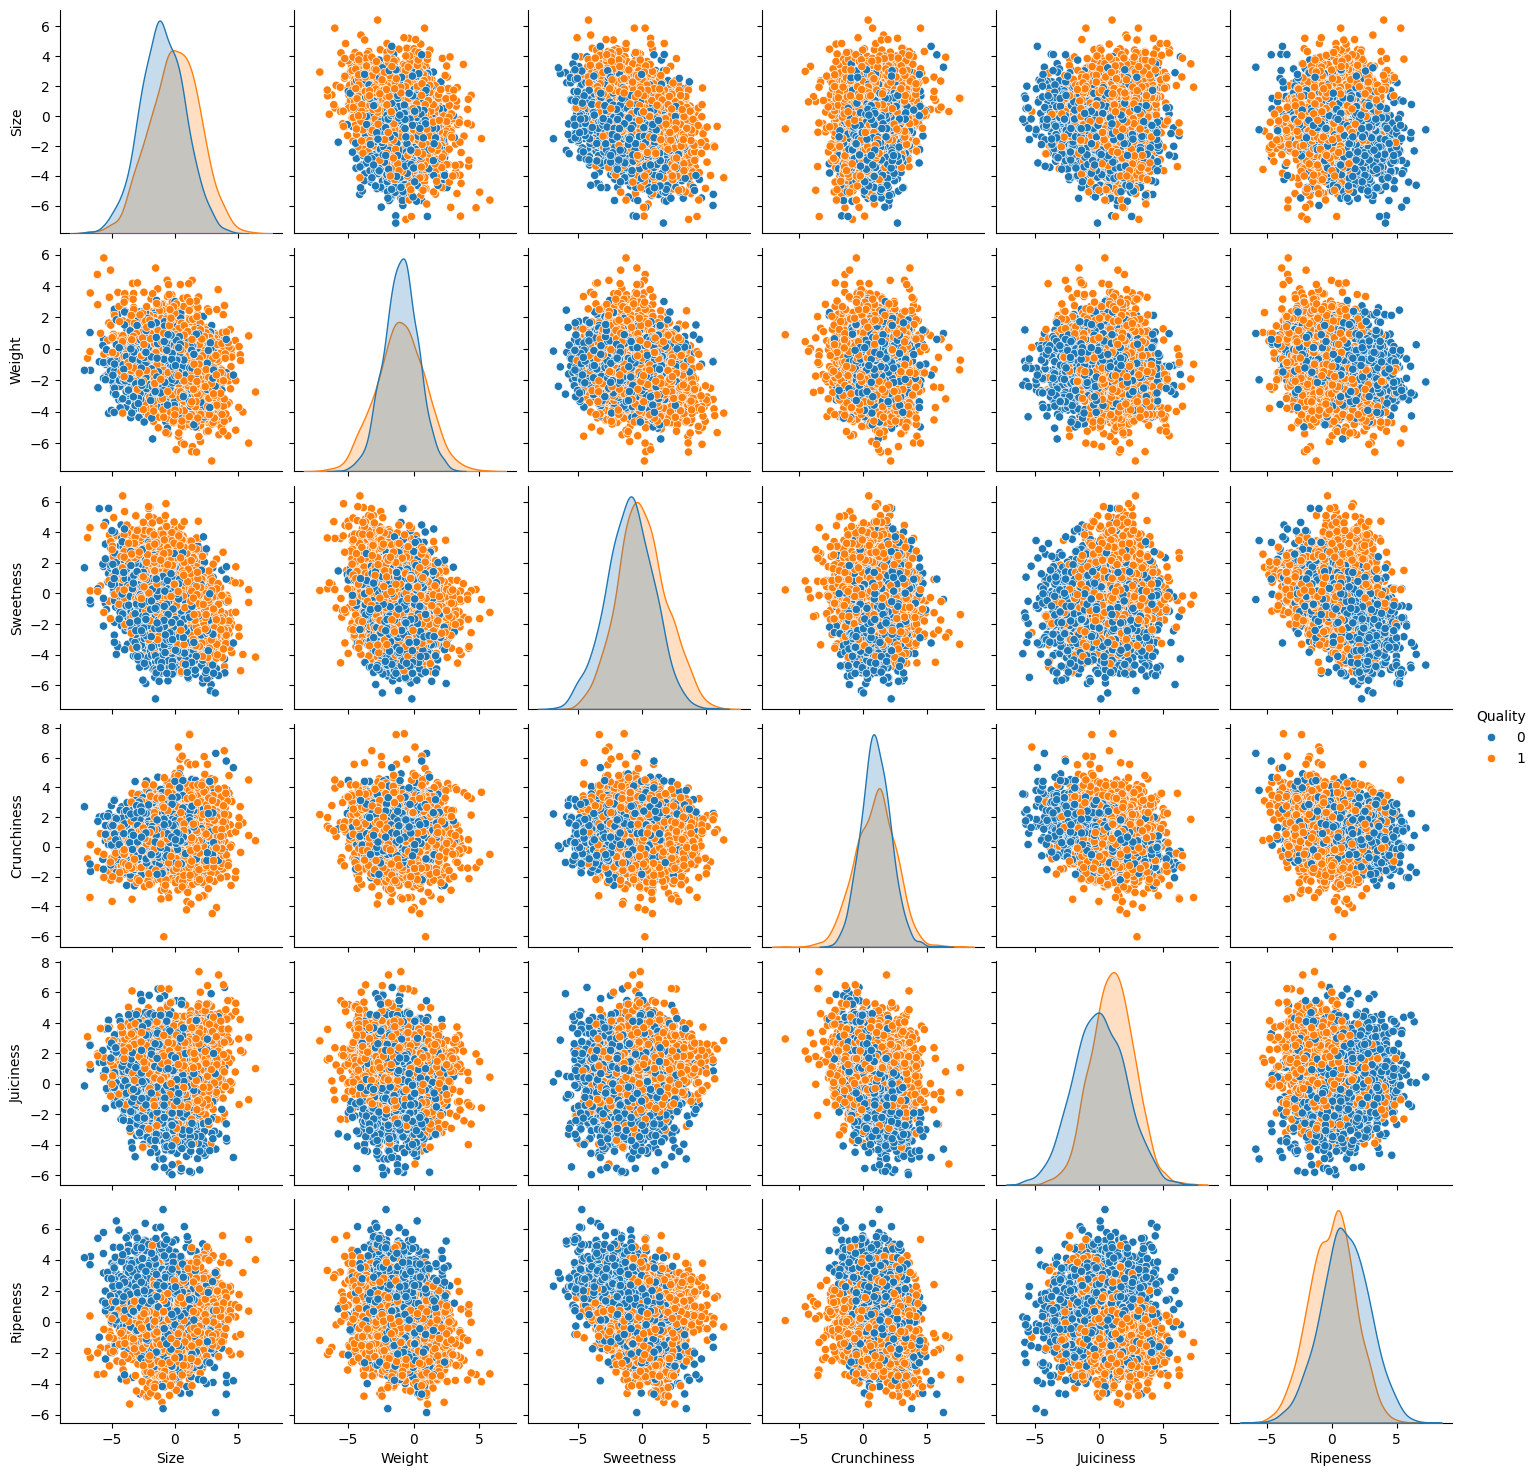

In [43]:
# Pairplot with target variable
sns.pairplot(df, hue='Quality')
plt.show()

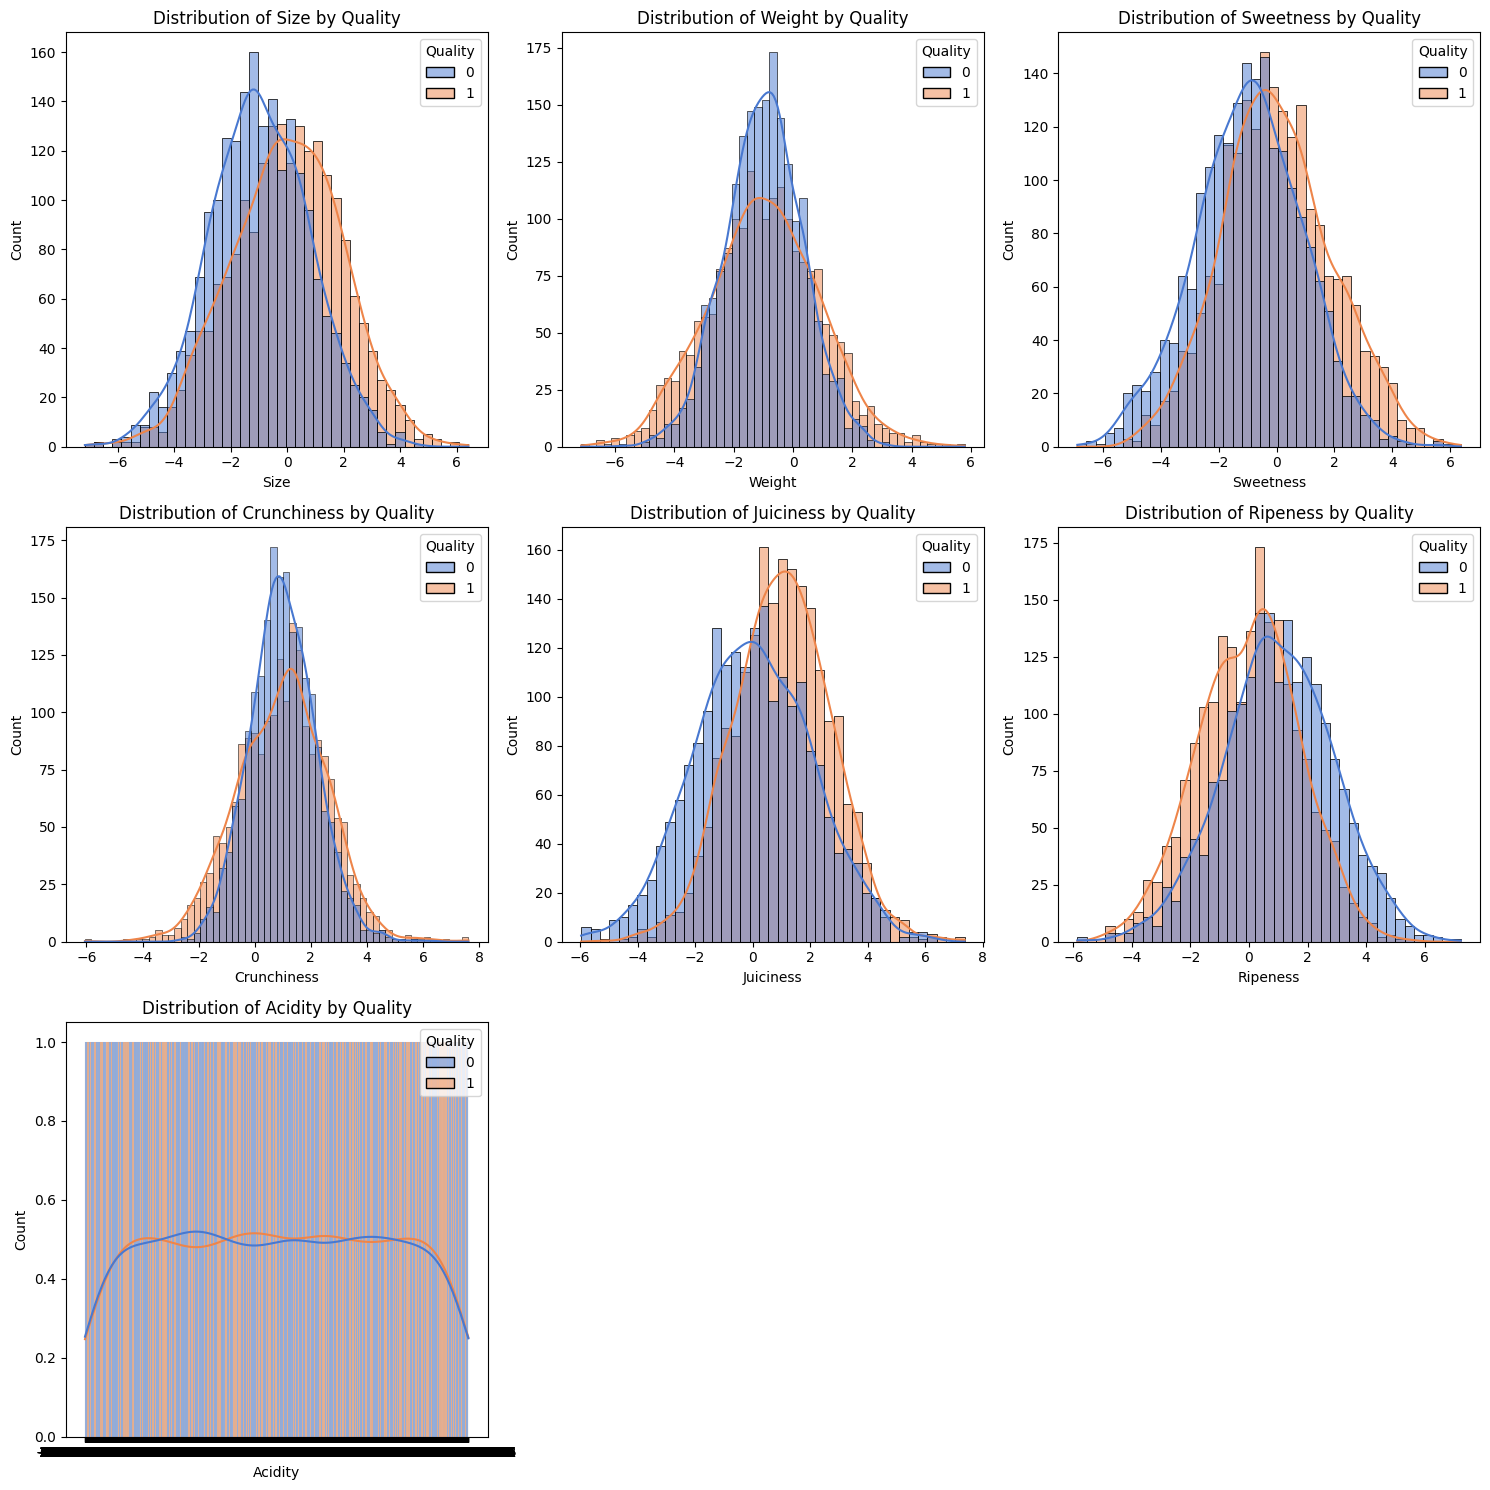

In [44]:
features = df.columns[:-1] 
num_features = len(features)
num_plots_per_row = 3
num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=df, x=feature, hue='Quality', kde=True, palette='muted', ax=ax)
    ax.set_title(f'Distribution of {feature} by Quality')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Remove any unused subplots
for j in range(num_features, num_rows * num_plots_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

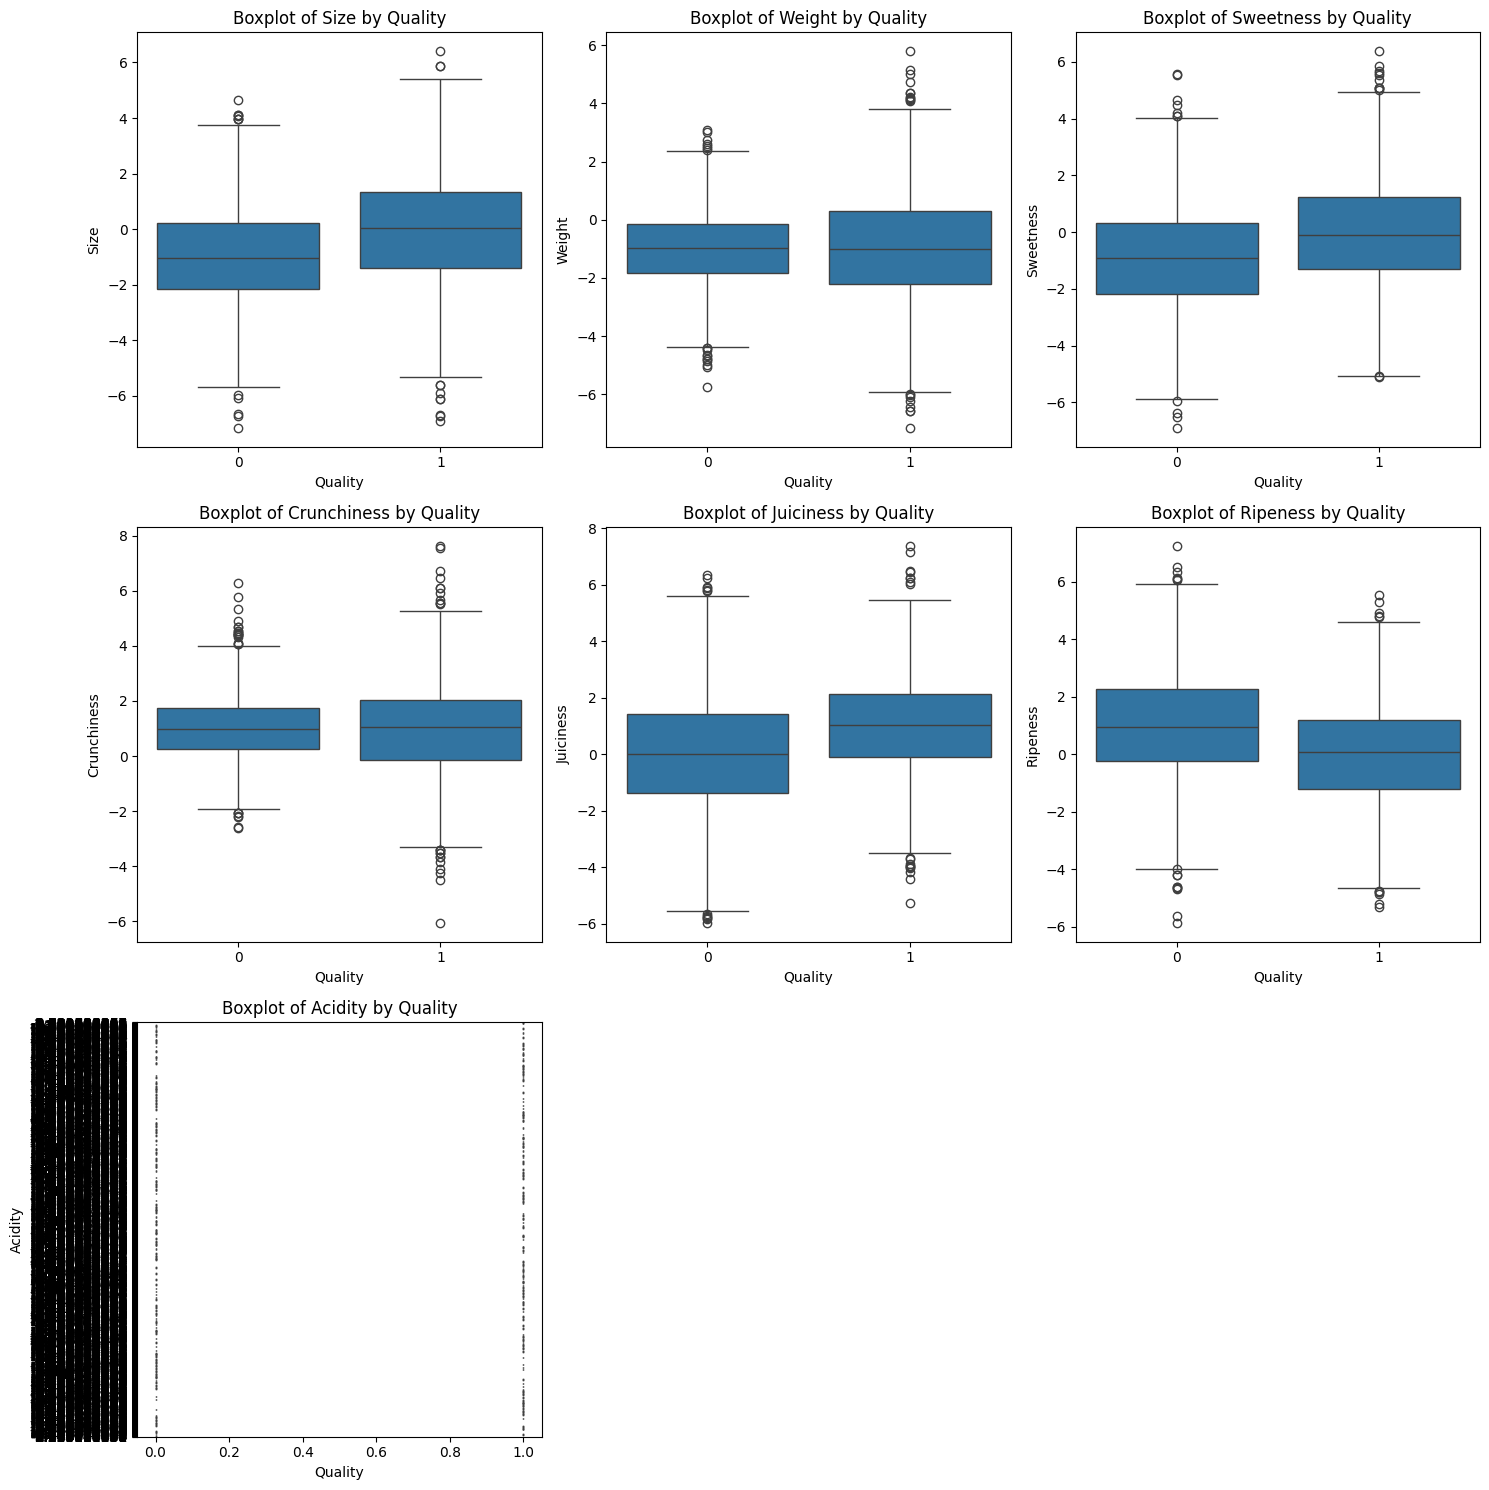

In [45]:
features = df.columns[:-1] 
num_features = len(features)
num_plots_per_row = 3
num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x='Quality', y=feature, data=df, ax=ax)
    ax.set_title(f'Boxplot of {feature} by Quality')
    ax.set_xlabel('Quality')
    ax.set_ylabel(feature)

# Remove any unused subplots
for j in range(num_features, num_rows * num_plots_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [46]:
# Scale dataset but not the target variable "Quality"
scaler = StandardScaler()
df_scaled = df.copy()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1


In [47]:
# Split the dataset into training and testing sets

X = df.drop('Quality', axis=1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3600, 7), (400, 7), (3600,), (400,))

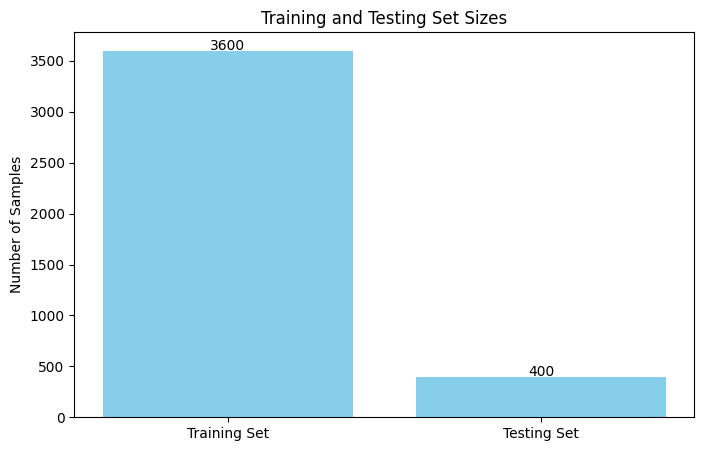

In [67]:
# Create a bar chart showing the size of the training and testing sets show also the amount of samples in each set
plt.figure(figsize=(8, 5))
plt.bar(['Training Set', 'Testing Set'], [len(y_train), len(y_test)], color='skyblue')
plt.ylabel('Number of Samples')
plt.title('Training and Testing Set Sizes')
plt.text(0, len(y_train) + 10, len(y_train), ha='center')
plt.text(1, len(y_test) + 10, len(y_test), ha='center')
plt.show()

In [48]:
# Feature selection using Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
Ripeness,0.173342
Juiciness,0.159967
Size,0.158337
Sweetness,0.153342
Acidity,0.129853
Weight,0.114485
Crunchiness,0.110674


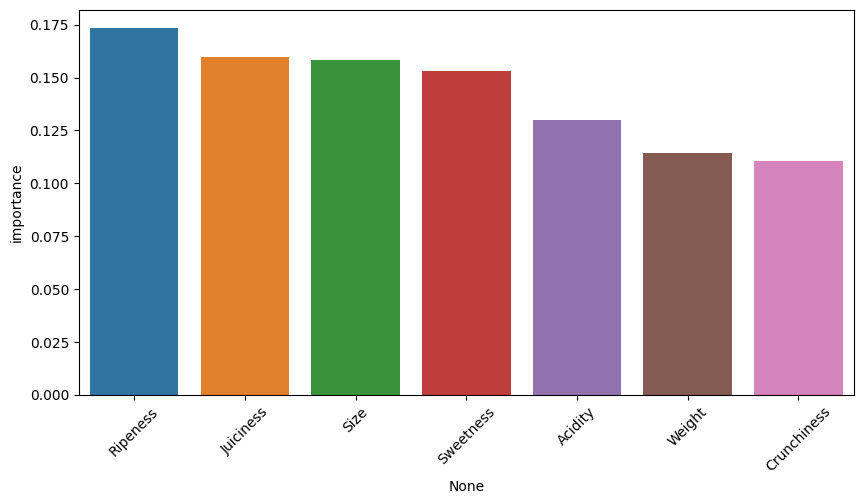

In [49]:
# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], hue=feature_importances.index)
plt.xticks(rotation=45)
plt.show()

In [50]:
# UMAP visualization

reducer = umap.UMAP()
X_train_umap = reducer.fit_transform(X_train)


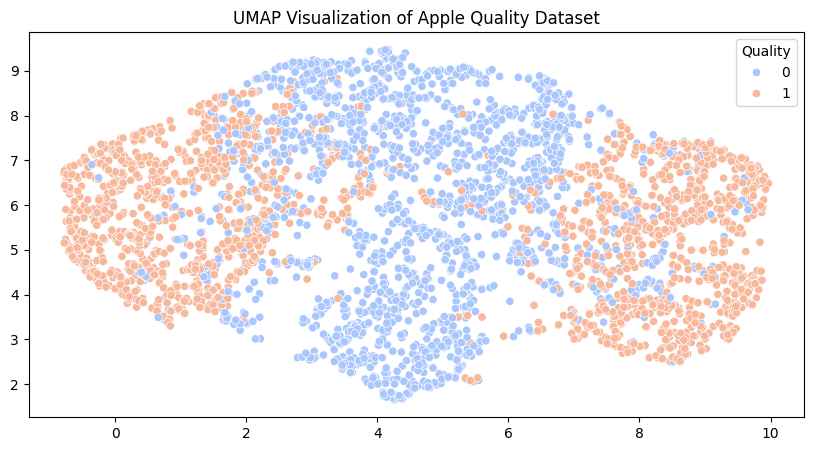

In [51]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=y_train, palette='coolwarm')
plt.title('UMAP Visualization of Apple Quality Dataset')
plt.show()

Best k value: 13
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       202
           1       0.84      0.92      0.88       198

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



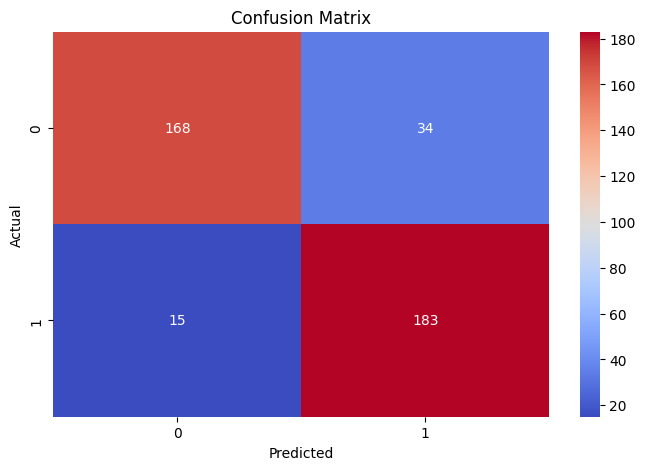

In [52]:
# Parameter grid for k-NN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Grid search for k-NN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best k-NN classifier
best_knn = knn_grid_search.best_estimator_

# Print the best k value
print(f'Best k value: {best_knn.n_neighbors}')

# Predict using the best k-NN classifier
y_pred = best_knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Print confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best parameters: {'max_depth': 20, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       202
           1       0.82      0.92      0.87       198

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



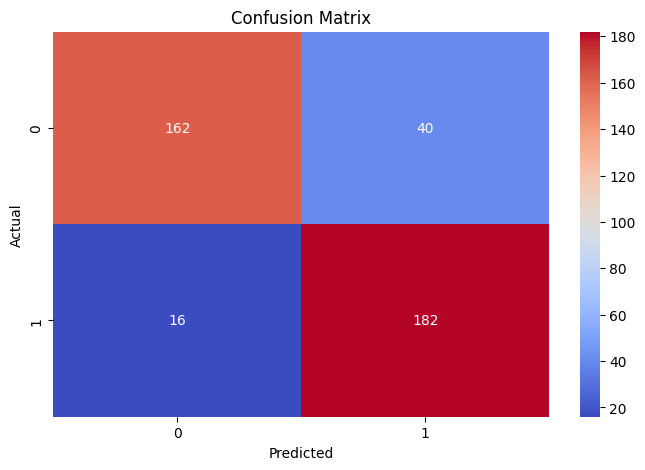

In [53]:
# Parameter grid for Random Forest
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [15, 20, 25]}

# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest classifier
best_rf = rf_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {rf_grid_search.best_params_}')

# Predict using the best Random Forest classifier
y_pred = best_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       202
           1       0.85      0.94      0.89       198

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



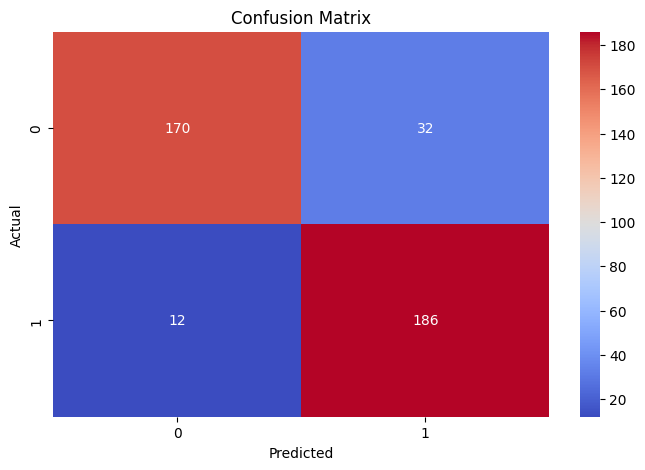

In [54]:
# Parameter grid for SVC
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# Grid search for SVC
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Get the best SVC classifier
best_svm = svm_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {svm_grid_search.best_params_}')

# Predict using the best SVC classifier
y_pred = best_svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       202
           1       0.86      0.93      0.89       198

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



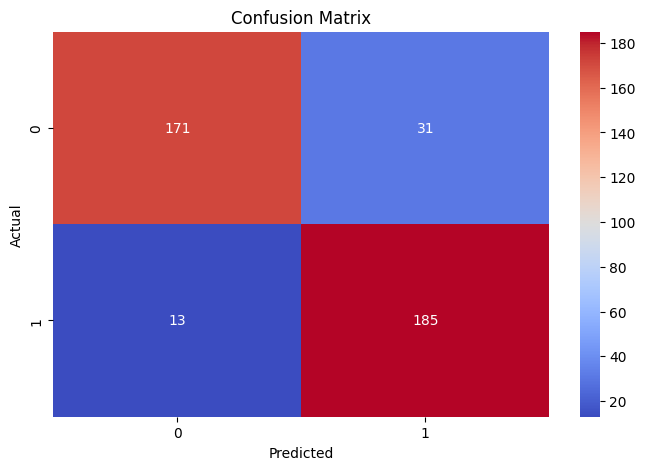

In [55]:
# Bagging Classifier with SVC
# Create a Bagging Classifier with the best SVC classifier
bagging_svm = BaggingClassifier(best_svm, n_estimators=100)
bagging_svm.fit(X_train, y_train)

# Predict using the Bagging Classifier
y_pred = bagging_svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'max_depth': 25, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       202
           1       0.85      0.92      0.89       198

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



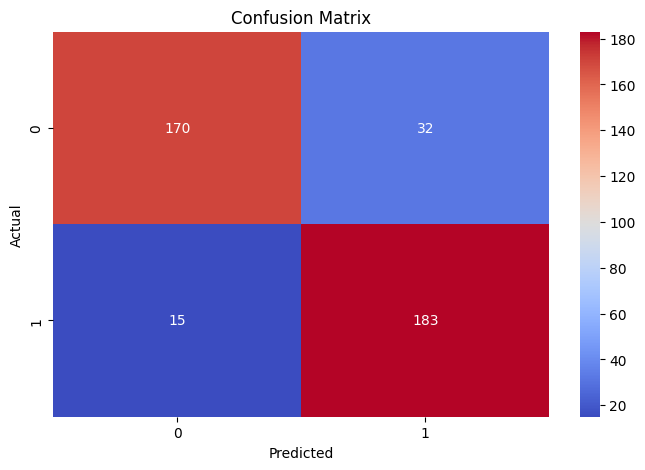

In [56]:
# Extra Trees Classifier

# Parameter grid for Extra Trees
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [15, 20, 25]}

# Grid search for Extra Trees
et_grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)

et_grid_search.fit(X_train, y_train)

# Get the best Extra Trees classifier

best_et = et_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {et_grid_search.best_params_}')

# Predict using the best Extra Trees classifier
y_pred = best_et.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       202
           1       0.78      0.88      0.83       198

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



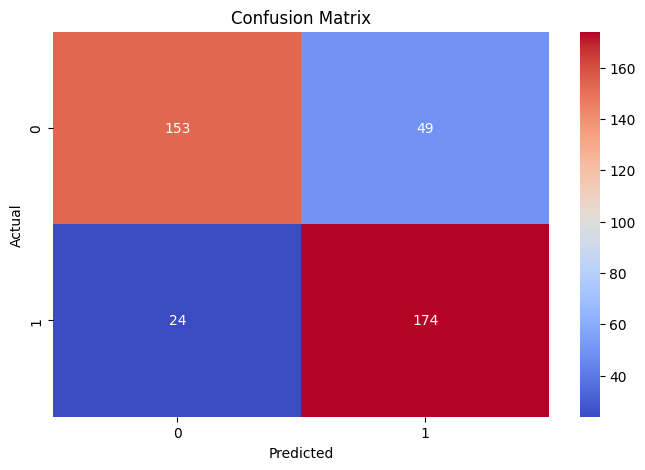

In [57]:
# Create a Neural Network model with early stopping

# Parameter grid for Neural Network
param_grid = {'hidden_layer_sizes': [(100,), (200,), (300,)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['adam'],
              'alpha': [0.0001, 0.001, 0.01]}

# Grid search for Neural Network
nn_grid_search = GridSearchCV(MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=5), param_grid, cv=5)

nn_grid_search.fit(X_train, y_train)

# Get the best Neural Network classifier
best_nn = nn_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {nn_grid_search.best_params_}')

# Predict using the best Neural Network classifier
y_pred = best_nn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best parameters: {'C': 1, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       202
           1       0.71      0.79      0.75       198

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



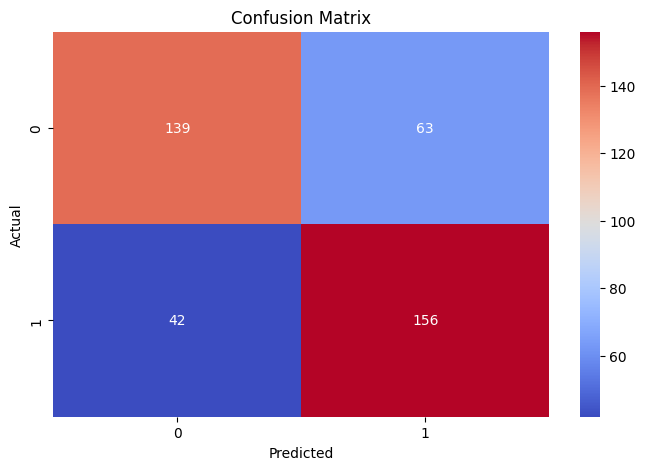

In [58]:
# Logistic Regression

# Parameter grid for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Get the best Logistic Regression classifier
best_lr = lr_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {lr_grid_search.best_params_}')

# Predict using the best Logistic Regression classifier
y_pred = best_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

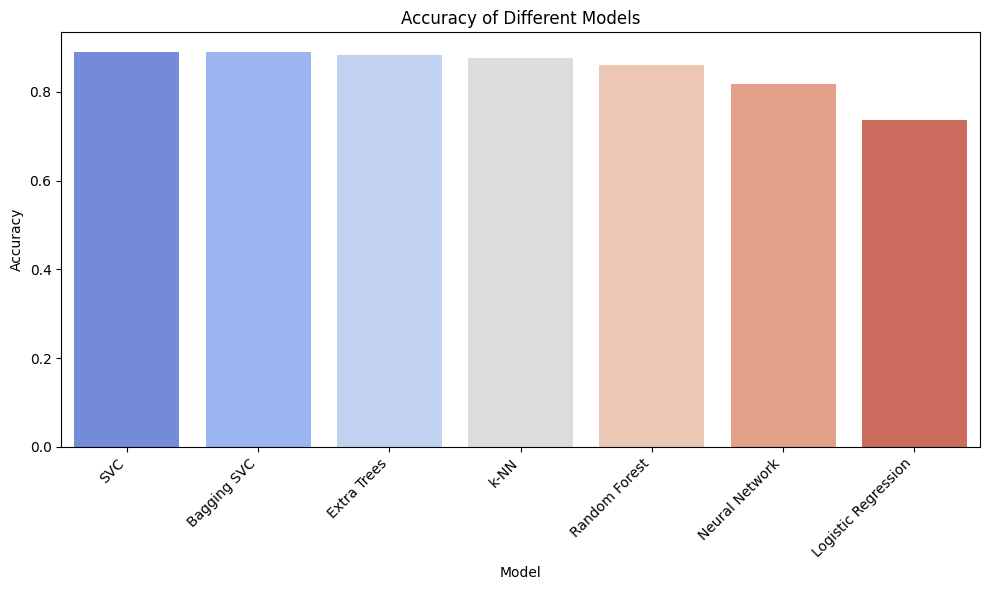

In [59]:

# Store accuracy scores of each model
accuracy_scores = []

# Evaluate k-NN model
y_pred = best_knn.predict(X_test)
accuracy_scores.append(('k-NN', accuracy_score(y_test, y_pred)))

# Evaluate Random Forest model
y_pred = best_rf.predict(X_test)
accuracy_scores.append(('Random Forest', accuracy_score(y_test, y_pred)))

# Evaluate SVC model
y_pred = best_svm.predict(X_test)
accuracy_scores.append(('SVC', accuracy_score(y_test, y_pred)))

# Evaluate Bagging Classifier with SVC model
y_pred = bagging_svm.predict(X_test)
accuracy_scores.append(('Bagging SVC', accuracy_score(y_test, y_pred)))

# Evaluate Extra Trees Classifier model
y_pred = best_et.predict(X_test)
accuracy_scores.append(('Extra Trees', accuracy_score(y_test, y_pred)))

# Evaluate Neural Network model
y_pred = best_nn.predict(X_test)
accuracy_scores.append(('Neural Network', accuracy_score(y_test, y_pred)))

# Evaluate Logistic Regression model
y_pred = best_lr.predict(X_test)
accuracy_scores.append(('Logistic Regression', accuracy_score(y_test, y_pred)))

# Create a DataFrame from accuracy scores
accuracy_df = pd.DataFrame(accuracy_scores, columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)

# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, hue='Model', palette='coolwarm')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

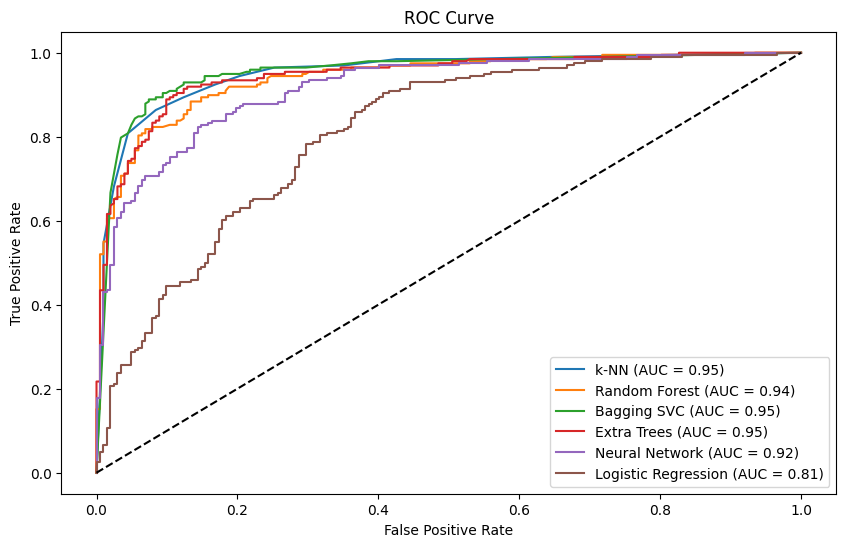

In [60]:
# Show ROC Curve for each model

# Create a list of models
models = [best_knn, best_rf, bagging_svm, best_et, best_nn, best_lr]

# Create a list of model names
model_names = ['k-NN', 'Random Forest', 'Bagging SVC', 'Extra Trees', 'Neural Network', 'Logistic Regression']

# Plot ROC Curve for each model
plt.figure(figsize=(10, 6))
for model, name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()